# <h1><center>BOSTON HOUSE PRICE PREDICTION</center></h1>

In this Assignment, the tasks considered based on the available features is as follows:</br>
<ol>
    <li>EDA and Pre-processing for the given dataset, if any</li>
    <li>Obtaining the Training Scores</li>
    <li>Geting all the Error Scores</li>
</ol>

In [22]:
#Importing the Reguired Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit


# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

In [4]:
#load/Read the given dataset
data = pd.read_csv('Boston_Train.csv')

<h2> Dataset Description</h2>
<p>The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:</p>
<ul>
    <li>CRIM - per capita crime rate by town</li>
    <li>ZN - proportion of residential land zoned for lots over 25,000 sq. ft.</li>
    <li>INDUS - proportion of non-retail business acres per town.</li>
    <li>CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)</li>
    <li>NOX - nitric oxides concentration (parts per 10 million)</li>
    <li>RM - average number of rooms per dwelling</li>
    <li>AGE - proportion of owner-occupied units built prior to 1940</li>
    <li>DIS - weighted distances to five Boston employment centers</li>
    <li>RAD - index of accessibility to radial highways</li>
    <li>TAX - full-value property-tax rate per 10,000</li>
    <li>PTRATIO - pupil-teacher ratio by town</li>
    <li>B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</li>
    <li>LSTAT - % lower status of the population</li>
    <li>MEDV - Median value of owner-occupied homes in 1000's</li>
</ul>

In [5]:
data.head(5)

Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2

In [6]:
data.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [16]:
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [17]:
data.shape

(351, 14)

In [24]:
data.isna().sum().sum()

0

In [25]:
data.duplicated().sum()

0

<h2>Data Exploration - statistical Analysis</h2>

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  351 non-null    int64  
 1   crim        351 non-null    float64
 2   zn          351 non-null    float64
 3   indus       351 non-null    float64
 4   chas        351 non-null    int64  
 5   nox         351 non-null    float64
 6   rm          351 non-null    float64
 7   age         351 non-null    float64
 8   dis         351 non-null    float64
 9   rad         351 non-null    int64  
 10  tax         351 non-null    int64  
 11  ptratio     351 non-null    float64
 12  black       351 non-null    float64
 13  lstat       351 non-null    float64
 14  medv        351 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 41.3 KB


In [18]:
data.describe()

crim          zn       indus        chas         nox          rm  \
count  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000   
mean     0.401659   15.327635    8.435670    0.076923    0.510737    6.403900   
std      0.641716   25.605040    6.088947    0.266850    0.102256    0.676424   
min      0.006320    0.000000    0.460000    0.000000    0.385000    4.903000   
25%      0.057845    0.000000    4.025000    0.000000    0.437450    5.949500   
50%      0.132620    0.000000    6.200000    0.000000    0.493000    6.266000   
75%      0.404865   22.000000   10.010000    0.000000    0.544000    6.733000   
max      4.097400  100.000000   25.650000    1.000000    0.871000    8.725000   

              age         dis         rad         tax     ptratio       black  \
count  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000   
mean    60.817949    4.420862    4.472934  310.344729   17.707692  380.489174   
std     28.393094    1.968666    1.615543   67.577707    2.198252   40.455904   
min      2.900000    1.321600    1.000000  188.000000   12.600000   70.800000   
25%     36.150000    2.768500    4.000000  264.000000   16.100000  383.670000   
50%     62.000000    4.095200    4.000000  304.000000   17.900000  392.690000   
75%     88.450000    5.871800    5.000000  358.000000   19.100000  396.220000   
max    100.000000    9.222900    8.000000  469.000000   21.200000  396.900000   

            lstat        medv  
count  351.000000  351.000000  
mean    10.407692   25.062678  
std      5.888639    8.461918  
min      1.730000   11.800000  
25%      6.095000   19.500000  
50%      9.380000   22.900000  
75%     13.210000   28.700000  
max     34.410000   50.000000

In [19]:
prices = data['medv']
features = data.drop('medv', axis = 1)

In [20]:
#correlation between the attributes
correlation = features.corr()
correlation

crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.298187  0.557235  0.129417  0.773321 -0.232369  0.487005   
zn      -0.298187  1.000000 -0.461280 -0.060150 -0.453540  0.327331 -0.516954   
indus    0.557235 -0.461280  1.000000  0.127674  0.669111 -0.384208  0.525184   
chas     0.129417 -0.060150  0.127674  1.000000  0.131093  0.037826  0.129274   
nox      0.773321 -0.453540  0.669111  0.131093  1.000000 -0.262861  0.667044   
rm      -0.232369  0.327331 -0.384208  0.037826 -0.262861  1.000000 -0.179751   
age      0.487005 -0.516954  0.525184  0.129274  0.667044 -0.179751  1.000000   
dis     -0.490656  0.592013 -0.594800 -0.153217 -0.719072  0.095919 -0.681234   
rad      0.140519 -0.187620  0.018118  0.087686  0.138287  0.094140  0.126482   
tax      0.406203 -0.109459  0.437328 -0.029835  0.394700 -0.204730  0.266733   
ptratio -0.222599 -0.323917  0.101026 -0.133981 -0.188388 -0.328928  0.049163   
black   -0.522173  0.141986 -0.311502 -0.054426 -0.427552  0.166340 -0.229513   
lstat    0.406877 -0.384008  0.512586  0.062915  0.488516 -0.680006  0.552882   

              dis       rad       tax   ptratio     black     lstat  
crim    -0.490656  0.140519  0.406203 -0.222599 -0.522173  0.406877  
zn       0.592013 -0.187620 -0.109459 -0.323917  0.141986 -0.384008  
indus   -0.594800  0.018118  0.437328  0.101026 -0.311502  0.512586  
chas    -0.153217  0.087686 -0.029835 -0.133981 -0.054426  0.062915  
nox     -0.719072  0.138287  0.394700 -0.188388 -0.427552  0.488516  
rm       0.095919  0.094140 -0.204730 -0.328928  0.166340 -0.680006  
age     -0.681234  0.126482  0.266733  0.049163 -0.229513  0.552882  
dis      1.000000 -0.104500 -0.229837  0.023590  0.235331 -0.343134  
rad     -0.104500  1.000000  0.229822 -0.023634 -0.060212 -0.026626  
tax     -0.229837  0.229822  1.000000 -0.011439 -0.270342  0.240023  
ptratio  0.023590 -0.023634 -0.011439  1.000000  0.109199  0.214381  
black    0.235331 -0.060212 -0.270342  0.109199  1.000000 -0.228561  
lstat   -0.343134 -0.026626  0.240023  0.214381 -0.228561  1.000000

<AxesSubplot:>

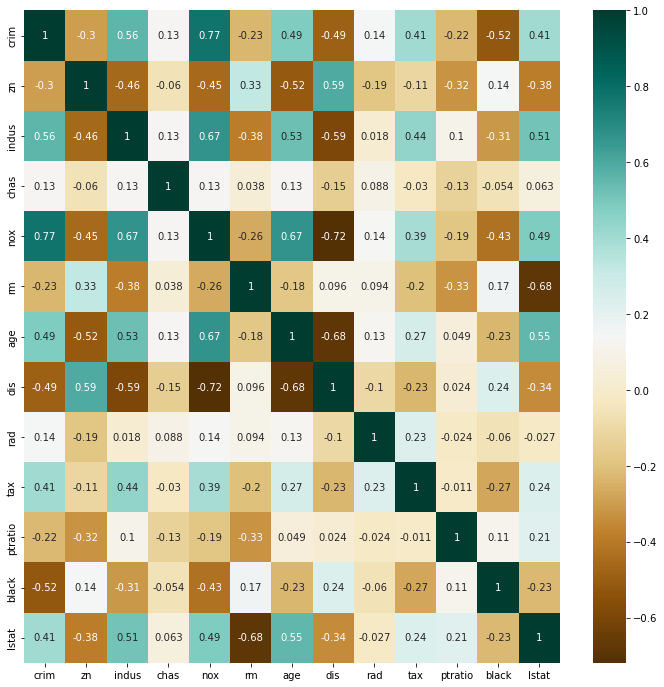

In [23]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation, annot=True, cmap ='BrBG')

<h2>Building the Model</h2>

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state=5)

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
print('The training score :',lr.score(x_train,y_train))

The training score : 0.8849331669988167


In [29]:
print('The validation score :',lr.score(x_test,y_test))

The validation score : 0.8131404184151241


In [30]:
#Model Validation Predictions
predict = lr.predict(x_test)
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
print('The RMSE is : ',sqrt(MSE(y_test,predict)))

The RMSE is :  3.2886311015901515


In [33]:
result = pd.DataFrame({'Actual':prices,'Predict':lr.predict(features)})
result.head()

Actual    Predict
0    24.0  27.771399
1    21.6  24.418666
2    34.7  32.686567
3    33.4  30.364447
4    36.2  31.215141

<h2> Predicting the information for the test data </h2>

In [34]:
#read the given data
test_data = pd.read_csv('Boston_Test.csv')

In [35]:
test_data.head()

Unnamed: 0     crim    zn  indus  chas    nox     rm   age      dis  rad  \
0         351  0.07950  60.0   1.69     0  0.411  6.579  35.9  10.7103    4   
1         352  0.07244  60.0   1.69     0  0.411  5.884  18.5  10.7103    4   
2         353  0.01709  90.0   2.02     0  0.410  6.728  36.1  12.1265    5   
3         354  0.04301  80.0   1.91     0  0.413  5.663  21.9  10.5857    4   
4         355  0.10659  80.0   1.91     0  0.413  5.936  19.5  10.5857    4   

   tax  ptratio   black  lstat  medv  
0  411     18.3  370.78   5.49  24.1  
1  411     18.3  392.33   7.79  18.6  
2  187     17.0  384.46   4.50  30.1  
3  334     22.0  382.80   8.05  18.2  
4  334     22.0  376.04   5.57  20.6

In [36]:
test_data.drop(test_data.columns[test_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [38]:
test_data.shape

(155, 14)

In [46]:
test_prices = test_data['medv']
test_features = test_data.drop('medv', axis = 1)

In [47]:
test_features.head()

crim    zn  indus  chas    nox     rm   age      dis  rad  tax  ptratio  \
0  0.07950  60.0   1.69     0  0.411  6.579  35.9  10.7103    4  411     18.3   
1  0.07244  60.0   1.69     0  0.411  5.884  18.5  10.7103    4  411     18.3   
2  0.01709  90.0   2.02     0  0.410  6.728  36.1  12.1265    5  187     17.0   
3  0.04301  80.0   1.91     0  0.413  5.663  21.9  10.5857    4  334     22.0   
4  0.10659  80.0   1.91     0  0.413  5.936  19.5  10.5857    4  334     22.0   

    black  lstat  
0  370.78   5.49  
1  392.33   7.79  
2  384.46   4.50  
3  382.80   8.05  
4  376.04   5.57

In [52]:
print('The Prediction score :',lr.score(test_features,y_test))

ValueError: Found input variables with inconsistent numbers of samples: [71, 155]